# Solving the Traveling Salesman  Problem using Local Search

Points: 10

## The Traveling Salesman Problem

Problem definition (see [TSP on Wikipedia](https://en.wikipedia.org/wiki/Travelling_salesman_problem)):

* __Goal:__ Find the shortest tour visiting each of $n$ cities exactly once and returning back to the starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$.

* __State space:__ Each state represents a tour. The cities are numbered and a tour can be expressed as vector  $\pi$ with the order in which the cities are visited (a [permutation](https://en.wikipedia.org/wiki/Permutation)). That is, $\pi(1)$ is the index of the first city to visit, $\pi(2)$ the index of the second, and so on.

* __Objective function:__ Minimize the tour length. The optimization problem is to find the optimal tour $\pi^*$ through the $n$ cities and returning to the starting city:

  > minimize: $\mathrm{tourlength}(\pi) = d_{\pi(n),\pi(1)} + \sum_{i = 1}^{n-1} d_{\pi(i),\pi(i+1)}$
  >
  > subject to: $\pi \ \text{is a valid permutation vector}$

* __Local moves:__ Exchange two cities in the order.

## Helper functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

np.set_printoptions(precision = 2)
pd.set_option('display.precision', 2)

# make the results repeatable
np.random.seed(1234)

In [ ]:
def random_tour(n):
    """Create a random tour"""

    tour = list(range(n))
    random.shuffle(tour)
    return(tour)

random_tour(10)

[8, 6, 7, 4, 2, 3, 0, 5, 9, 1]

In [ ]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a
    pairwise Euclidean distance matrix.
    """

    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })

    dist = squareform(pdist(pos))

    return({"pos": pos, "dist": dist})

tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
      x     y
0  0.19  0.36
1  0.62  0.50
2  0.44  0.68
3  0.79  0.71
4  0.78  0.37
5  0.27  0.56
6  0.28  0.50
7  0.80  0.01
8  0.96  0.77
9  0.88  0.88
Distance matrix:
      0     1     2     3     4     5     6     7     8     9
0  0.00  0.45  0.41  0.69  0.59  0.22  0.17  0.70  0.87  0.86
1  0.45  0.00  0.26  0.27  0.20  0.35  0.35  0.52  0.43  0.46
2  0.41  0.26  0.00  0.35  0.46  0.21  0.24  0.76  0.53  0.48
3  0.69  0.27  0.35  0.00  0.34  0.53  0.55  0.70  0.18  0.19
4  0.59  0.20  0.46  0.34  0.00  0.54  0.52  0.36  0.44  0.52
5  0.22  0.35  0.21  0.53  0.54  0.00  0.06  0.76  0.72  0.68
6  0.17  0.35  0.24  0.55  0.52  0.06  0.00  0.72  0.73  0.71
7  0.70  0.52  0.76  0.70  0.36  0.76  0.72  0.00  0.77  0.87
8  0.87  0.43  0.53  0.18  0.44  0.72  0.73  0.77  0.00  0.14
9  0.86  0.46  0.48  0.19  0.52  0.68  0.71  0.87  0.14  0.00)


In [ ]:
def tour_length(tsp, tour):
    """Caclulate the length of a tour, i.e., the objective function."""

    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()

    tl = 0
    dist = tsp["dist"]

    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]

    tl += dist[tour[-1], tour[0]]

    return(tl)

tour = random_tour(10)
tour_length(tsp, tour)

np.float64(3.390157130282606)

Tour length: 3.39


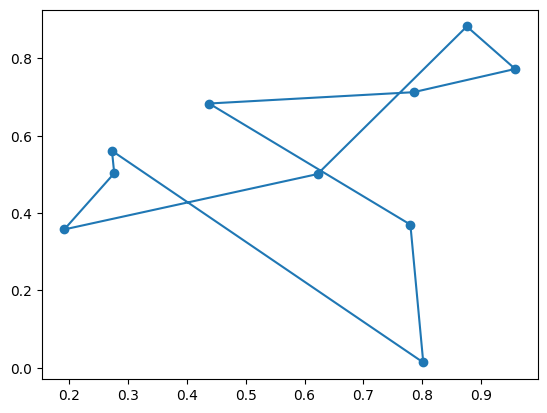

In [ ]:
def show_tsp(tsp, tour = None):
    """display the traveling salesman problem and a tour."""

    pos = tsp["pos"]

    plt.scatter(pos["x"], pos["y"])

    if tour is not None:
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()

        print(f"Tour length: {round(tour_length(tsp, tour), 2)}")

        pos_ = pos.reindex(tour)
        pos_ = pd.concat([pos_, pos_.head(1)])
        plt.plot(pos_["x"], pos_["y"])

    plt.show()

show_tsp(tsp, tour)

## Use R to find a solution

Load rpy2, make sure the R [TSP package](https://CRAN.R-project.org/package=TSP) is installed and prepare the distance matrix.

In [ ]:
%load_ext rpy2.ipython

%R if(!"TSP" %in% rownames(installed.packages())) install.packages("TSP", repos="http://cran.us.r-project.org")
%R if(!"microbenchmark" %in% rownames(installed.packages())) install.packages("microbenchmark", repos="http://cran.us.r-project.org")

d = tsp["dist"]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘iterators’, ‘foreach’

trying URL 'http://cran.us.r-project.org/src/contrib/iterators_1.0.14.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/foreach_1.5.2.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/TSP_1.2-5.tar.gz'

The downloaded source packages are in
	‘/tmp/RtmpFu5Lgl/downloaded_packages’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/microbenchmark_1.5.0.tar.gz'
Content type 'application/x-gzip' length 61673 bytes (60 KB)
downloaded 60 KB


The downloaded source packages are in
	‘/tmp/RtmpFu5Lgl/downloaded_packages’


Solve the TSP using [`solve_TSP`](https://www.rdocumentation.org/packages/TSP/versions/1.1-10/topics/solve_TSP) with the default heuristic. Note that 2-opt is steepest ascend hill climbing with exchanging two cities. `rep = 10` means 10 random restarts.

In [ ]:
%%R -i d -o tour

library("TSP")

tsp <- TSP(d)
print(tsp)

tour <- solve_TSP(tsp, rep = 10)
print(tour)

# R starts index with 1, but Python starts at 0
tour <- tour - 1L

object of class ‘TSP’ 
10 cities (distance ‘unknown’) 
object of class ‘TOUR’ 
result of method ‘arbitrary_insertion+two_opt_rep_10’ for 10 cities
tour length: 2.763574 


In addition: Warning message:
executing %dopar% sequentially: no parallel backend registered 


Tour length: 2.76


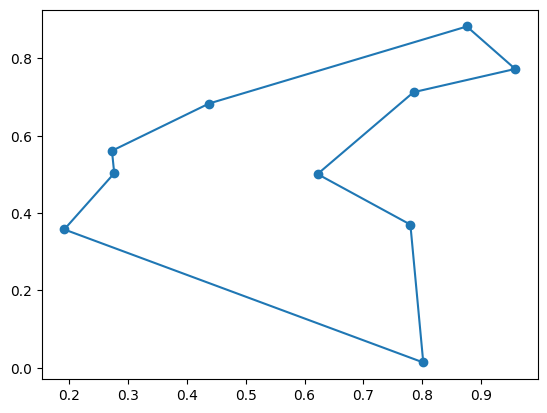

In [ ]:
show_tsp(tsp, tour)

How long does it take to solve the problem?

In [ ]:
%%R -i d

library("microbenchmark")
d <- TSP(d)


microbenchmark(solve_TSP(d, rep = 10))

Unit: milliseconds
                   expr     min       lq     mean   median       uq      max
 solve_TSP(d, rep = 10) 5.96439 6.219107 6.943851 6.331966 6.802576 17.38795
 neval
   100


## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

In [ ]:
import itertools

def move_swap(tour):
    """Hoán đổi ngẫu nhiên 2 thành phố."""
    new_tour = tour.copy()
    i, j = random.sample(range(len(new_tour)), 2)
    new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
    return new_tour

def SAHC(tsp, tour=None, local_move_method=move_swap, max_steps=10000, verbose=True, keep_history=False):
    n = len(tsp['pos'])
    if keep_history: history = []

    if tour is None:
        current_tour = random_tour(n)
    else:
        current_tour = tour.copy()

    current_length = tour_length(tsp, current_tour)
    if verbose: print(f"initial tour length: {current_length:.3f}")

    for step in range(max_steps):
        best_tour = current_tour
        best_length = current_length

        for i, j in itertools.combinations(range(n), 2):
            new_tour = current_tour.copy()
            new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
            new_length = tour_length(tsp, new_tour)

            if new_length < best_length:
                best_tour = new_tour
                best_length = new_length

        if best_length >= current_length:
            if verbose: print(f"step: {step} - no better neighbor found.")
            break

        current_tour = best_tour
        current_length = best_length
        if keep_history: history.append(current_length)
        if verbose: print(f"step: {step} - new tour length: {current_length:.3f}")

    if keep_history:
        return current_tour, history
    return current_tour


## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend with random restarts.

Starting Steepest-Ascent Hill Climbing with 10 Random Restarts...
Restart 1/10: Start Length = 4.19, Found Local Optimum Length = 2.88
  -> New best tour found with length: 2.88
Restart 2/10: Start Length = 5.39, Found Local Optimum Length = 2.79
  -> New best tour found with length: 2.79
Restart 3/10: Start Length = 3.46, Found Local Optimum Length = 2.76
  -> New best tour found with length: 2.76
Restart 4/10: Start Length = 4.57, Found Local Optimum Length = 2.91
Restart 5/10: Start Length = 6.06, Found Local Optimum Length = 2.76
Restart 6/10: Start Length = 5.10, Found Local Optimum Length = 2.76
Restart 7/10: Start Length = 4.48, Found Local Optimum Length = 2.88
Restart 8/10: Start Length = 5.40, Found Local Optimum Length = 2.88
Restart 9/10: Start Length = 4.71, Found Local Optimum Length = 2.79
Restart 10/10: Start Length = 3.71, Found Local Optimum Length = 2.81

Search finished in 0.0187 seconds.

--- Best Overall Tour ---
Tour length: 2.76


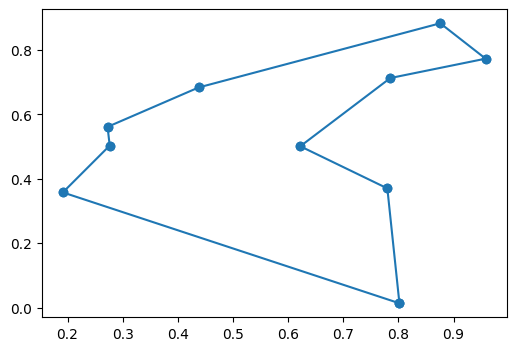

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from scipy.spatial.distance import pdist, squareform
import itertools
import time

# Set display options for numpy and pandas for cleaner output
np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

# Make the results repeatable by setting a random seed
np.random.seed(1234)

def random_tour(n):
    tour = list(range(n))
    random.shuffle(tour)
    return tour

def random_tsp(n):
    pos = pd.DataFrame({
        "x": np.random.uniform(size=n),
        "y": np.random.uniform(size=n)
    })
    dist = squareform(pdist(pos))
    return {"pos": pos, "dist": dist}

def tour_length(tsp, tour):
    # Make sure tour is a Python list
    if not isinstance(tour, list):
        tour = tour.tolist()

    tl = 0
    dist = tsp["dist"]

    # Sum distances between consecutive cities
    for i in range(len(tour) - 1):
        tl += dist[tour[i], tour[i+1]]

    # Add the distance from the last city back to the first
    tl += dist[tour[-1], tour[0]]

    return tl

def show_tsp(tsp, tour=None):
    pos = tsp["pos"]
    plt.figure(figsize=(6, 4))
    plt.scatter(pos["x"], pos["y"])

    if tour is not None:
        # Make sure tour is a Python list
        if not isinstance(tour, list):
            tour = tour.tolist()

        print(f"Tour length: {round(tour_length(tsp, tour), 2)}")

        # Reorder positions based on the tour and add the starting point at the end to close the loop
        pos_ = pos.reindex(tour)
        pos_ = pd.concat([pos_, pos_.head(1)])  # dùng concat thay cho append (bị loại bỏ trong pandas mới)
        plt.plot(pos_["x"], pos_["y"], '-o')

    plt.show()


def steepest_ascent_hill_climbing(tsp, initial_tour):
    current_tour = list(initial_tour)
    n = len(current_tour)

    while True:
        current_length = tour_length(tsp, current_tour)
        best_neighbor = current_tour
        best_neighbor_length = current_length

        # Generate all possible pairs of cities to swap
        for i, j in itertools.combinations(range(n), 2):
            neighbor = list(current_tour)
            # Swap two cities to create a neighbor
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]

            neighbor_length = tour_length(tsp, neighbor)

            # If this neighbor is better than the best one found so far, update
            if neighbor_length < best_neighbor_length:
                best_neighbor = neighbor
                best_neighbor_length = neighbor_length

        # If we found a better neighbor, move to it. Otherwise, we are at a local optimum.
        if best_neighbor_length < current_length:
            current_tour = best_neighbor
        else:
            # No improvement found, so the search ends.
            break

    return current_tour


def random_restarts_hill_climbing(tsp, restarts=10):
    best_overall_tour = None
    best_overall_length = float('inf')

    n_cities = len(tsp['pos'])

    for i in range(restarts):
        # 1. Generate a new random starting tour
        initial_tour = random_tour(n_cities)
        initial_length = tour_length(tsp, initial_tour)

        # 2. Run steepest-ascent hill climbing from this start
        local_optimum_tour = steepest_ascent_hill_climbing(tsp, initial_tour)
        local_optimum_length = tour_length(tsp, local_optimum_tour)

        print(f"Restart {i+1}/{restarts}: Start Length = {initial_length:.2f}, Found Local Optimum Length = {local_optimum_length:.2f}")

        # 3. Compare with the best solution found so far
        if local_optimum_length < best_overall_length:
            best_overall_tour = local_optimum_tour
            best_overall_length = local_optimum_length
            print(f"  -> New best tour found with length: {best_overall_length:.2f}")

    return best_overall_tour


# --- Main execution block to demonstrate the algorithm ---
tsp = random_tsp(10)
num_restarts = 10

print(f"Starting Steepest-Ascent Hill Climbing with {num_restarts} Random Restarts...")
start_time = time.time()
best_tour_found = random_restarts_hill_climbing(tsp, restarts=num_restarts)
end_time = time.time()

print(f"\nSearch finished in {end_time - start_time:.4f} seconds.")
print("\n--- Best Overall Tour ---")
show_tsp(tsp, best_tour_found)


## Stochastic Hill Climbing [1 Points]

Chooses randomly from among all uphill moves.

Độ dài hành trình cuối cùng (Stochastic Hill Climb): 2.79
Tour length: 2.79


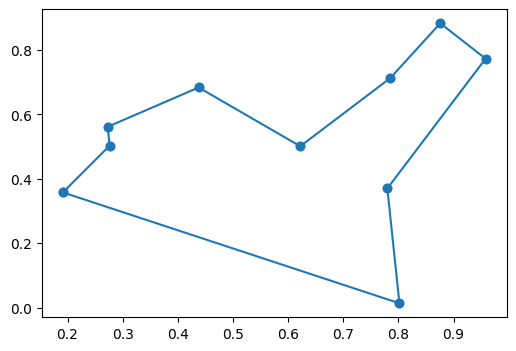

In [ ]:
def stochastic_hill_climb(tsp, max_iterations=1000):
    """
    Thuật toán Stochastic Hill Climbing cho bài toán TSP
    - Chọn ngẫu nhiên một bước cải thiện (uphill move) trong tất cả các hoán đổi hai thành phố.
    """
    n = len(tsp["dist"])
    current_tour = random_tour(n)
    current_length = tour_length(tsp, current_tour)

    for _ in range(max_iterations):
        neighbors = []
        lengths = []

        # Tạo tất cả các trạng thái lân cận bằng cách hoán đổi hai thành phố
        for i in range(n - 1):
            for j in range(i + 1, n):
                new_tour = current_tour.copy()
                new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
                new_length = tour_length(tsp, new_tour)

                # Chỉ lưu lại các bước "lên dốc" (tốt hơn)
                if new_length < current_length:
                    neighbors.append(new_tour)
                    lengths.append(new_length)

        # Nếu không còn hàng xóm nào tốt hơn → đạt cực trị cục bộ
        if not neighbors:
            break

        # Chọn ngẫu nhiên một hàng xóm tốt hơn trong danh sách
        idx = random.randint(0, len(neighbors) - 1)
        current_tour = neighbors[idx]
        current_length = lengths[idx]

    return current_tour, current_length


# 🔹 Chạy thuật toán Stochastic Hill Climbing
best_tour, best_length = stochastic_hill_climb(tsp, max_iterations=1000)

print(f"Độ dài hành trình cuối cùng (Stochastic Hill Climb): {round(best_length, 2)}")
show_tsp(tsp, best_tour)


## Stochastic Hill Climbing (First-choice) [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

### Local Moves
I implement the following three different local move strategies:
* Swap two random cities.
* Swap two neighboring cities.
* Reverse the subtour between two cities.

In [ ]:
def move_swap(tour):
    new_tour = tour.copy()

    # np.random.randint is inclusive lower limit and exclusive upper limit
    [a, b] = np.random.randint(0, len(tour), 2)
    #print(f"a={a}, b={b}")

    new_tour[a] = tour[b]
    new_tour[b] = tour[a]
    return(new_tour)

print(move_swap(list(range(10))))
print(move_swap(list(range(10))))
print(move_swap(list(range(10))))

[7, 1, 2, 3, 4, 5, 6, 0, 8, 9]
[9, 1, 2, 3, 4, 5, 6, 7, 8, 0]
[0, 1, 3, 2, 4, 5, 6, 7, 8, 9]


In [ ]:
def move_swap_neighbors(tour):
    new_tour = tour.copy()

    a = np.random.randint(0, len(tour)-1, 1)[0]
    if a > 0: b = a+1
    else: b = len(tour)-1
    #print(f"a={a}, b={b}")

    new_tour[a] = tour[b]
    new_tour[b] = tour[a]
    return(new_tour)

print(move_swap_neighbors(list(range(10))))
print(move_swap_neighbors(list(range(10))))
print(move_swap_neighbors(list(range(10))))

[0, 1, 2, 4, 3, 5, 6, 7, 8, 9]
[0, 2, 1, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 4, 3, 5, 6, 7, 8, 9]


In [ ]:
def move_reverse(tour):
    new_tour = tour.copy()

    ab = np.random.randint(0, len(tour)+1, 2)
    ab.sort()
    #print(f"a={ab[0]}, b={ab[1]}")

    new_tour[ab[0]:ab[1]] = new_tour[ab[0]:ab[1]][::-1]
    return(new_tour)

print(move_reverse(list(range(10))))
print(move_reverse(list(range(10))))
print(move_reverse(list(range(10))))

[0, 9, 8, 7, 6, 5, 4, 3, 2, 1]
[0, 1, 2, 6, 5, 4, 3, 7, 8, 9]
[0, 9, 8, 7, 6, 5, 4, 3, 2, 1]


### Search Algorithm

I don't know what the optimal tour is so I run the algorithm for at most `max_steps` steps, and stop if there is no improvement for at least `stop_after` steps.

In [ ]:
def FCSHC(tsp, tour = None, local_move_method = move_swap,
         max_steps = 1000000, stop_after = 1000, verbose = True, keep_history = False):

    n = len(tsp['pos'])

    if keep_history: history = list()

    # 1. initialize current tour
    # current tour = initial tour (random if no tour is given)
    if not tour is None:
        current_tour = tour
    else:
        current_tour = random_tour(n)


    # initial tour length
    current_length = tour_length(tsp, current_tour)
    if verbose: print(f"initial tour length: {current_length}")

    # step when we last improved the length
    last_improvement_step = 0

    # 2. repeat local moves
    for step in range(max_steps):

        new_tour = local_move_method(current_tour)
        new_length = tour_length(tsp, new_tour)

        # check if the new tour is better
        if new_length < current_length:
            current_tour = new_tour
            current_length = new_length
            last_improvement_step = step
            if verbose: print(f"step: {step} - new tour length: {current_length}")

        if keep_history: history.append(current_length)

        # stop if we did not improve for stop_after steps
        if step - last_improvement_step > stop_after:
            if verbose: print(f"step: {step} - no improvement for {stop_after} steps.")
            break


    if keep_history: return(current_tour, history)
    return(current_tour)

### Comparison of Local Move Strategies Using a Single Problem

Tour length: 5.06


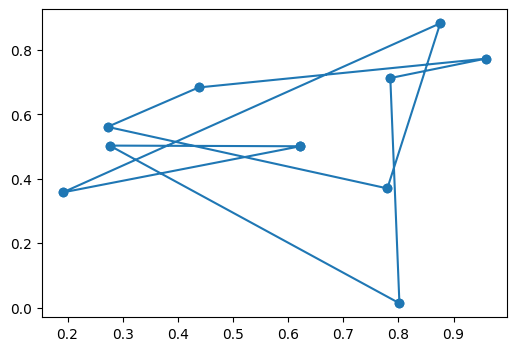

In [ ]:
initial_tour = random_tour(len(tsp['pos']))
show_tsp(tsp, initial_tour)

initial tour length: 5.05885957992727
step: 0 - new tour length: 4.945539707909842
step: 1 - new tour length: 4.686553856314442
step: 2 - new tour length: 4.524701575500667
step: 4 - new tour length: 4.378200780349547
step: 13 - new tour length: 4.357352376232635
step: 14 - new tour length: 4.353793678554098
step: 17 - new tour length: 4.085660114486803
step: 23 - new tour length: 3.8060466805319697
step: 25 - new tour length: 3.73723683041639
step: 29 - new tour length: 3.712373249881292
step: 42 - new tour length: 3.654140061060668
step: 46 - new tour length: 3.4561186239919603
step: 48 - new tour length: 3.4178019995939324
step: 57 - new tour length: 3.376150385806965
step: 86 - new tour length: 3.2507029546662034
step: 100 - new tour length: 3.2397728772476366
step: 139 - new tour length: 3.1582246756673014
step: 144 - new tour length: 2.873664673899467
step: 206 - new tour length: 2.7865169894199324
step: 1207 - no improvement for 1000 steps.
CPU times: user 42.1 ms, sys: 6.85 ms,

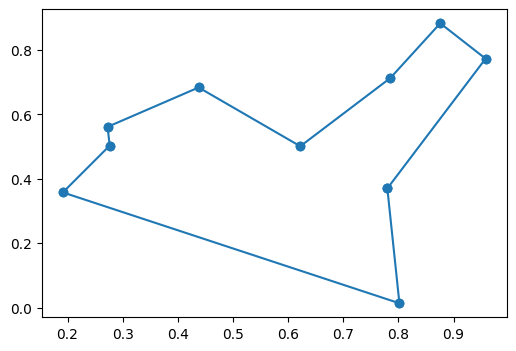

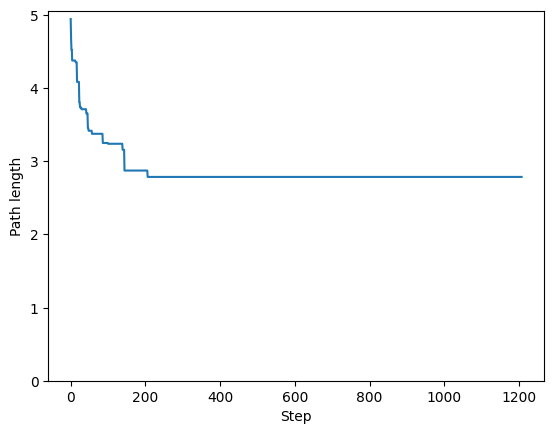

In [ ]:
%time tour, history_swap = FCSHC(tsp, initial_tour, local_move_method = move_swap, keep_history = True)
show_tsp(tsp, tour)

plt.plot(range(len(history_swap)), history_swap)
plt.xlabel("Step")
plt.ylabel("Path length")
plt.ylim(bottom = 0)
plt.show()

initial tour length: 5.05885957992727
step: 6 - new tour length: 4.477358749556233
step: 10 - new tour length: 4.365495542407016
step: 15 - new tour length: 4.352656481297996
step: 54 - new tour length: 4.2457156896384625
step: 1055 - no improvement for 1000 steps.
CPU times: user 28.8 ms, sys: 10.8 ms, total: 39.6 ms
Wall time: 34.2 ms
Tour length: 4.25


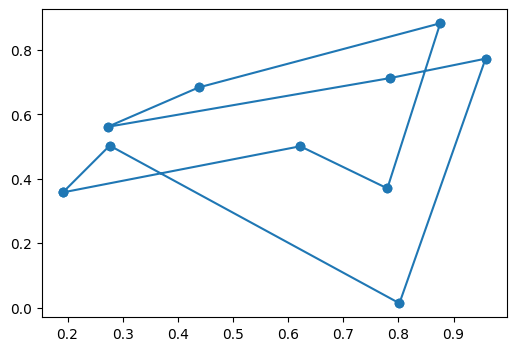

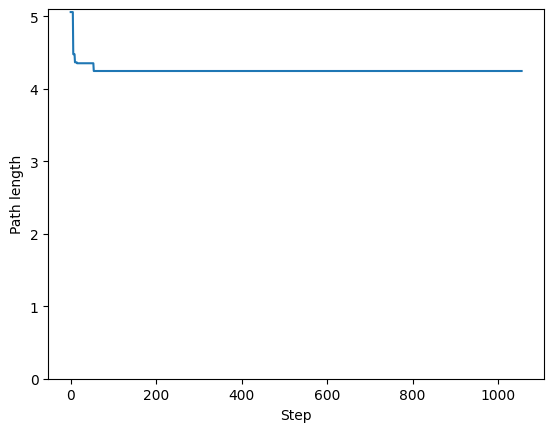

In [ ]:
%time tour, history_swap_neighbors = FCSHC(tsp, initial_tour, local_move_method = move_swap_neighbors, keep_history = True)
show_tsp(tsp, tour)

plt.plot(range(len(history_swap_neighbors)), history_swap_neighbors)
plt.xlabel("Step")
plt.ylabel("Path length")
plt.ylim(bottom = 0)
plt.show()

initial tour length: 5.05885957992727
step: 2 - new tour length: 5.046486353482705
step: 4 - new tour length: 4.921038922341943
step: 5 - new tour length: 4.339538091970906
step: 8 - new tour length: 4.022506253706479
step: 16 - new tour length: 4.00600143255723
step: 22 - new tour length: 3.394643413829337
step: 28 - new tour length: 3.2352411107897865
step: 43 - new tour length: 3.0150967958232426
step: 63 - new tour length: 3.015096795823242
step: 87 - new tour length: 2.9587895164021214
step: 103 - new tour length: 2.9062078251965873
step: 1104 - no improvement for 1000 steps.
CPU times: user 17.9 ms, sys: 1.04 ms, total: 19 ms
Wall time: 19.9 ms
Tour length: 2.91


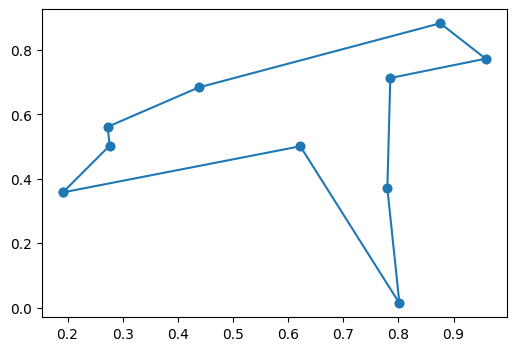

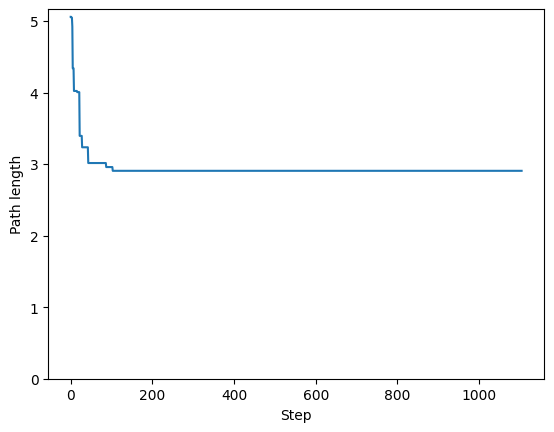

In [ ]:
%time tour, history_reverse = FCSHC(tsp, initial_tour, local_move_method = move_reverse, keep_history = True)
show_tsp(tsp, tour)

plt.plot(range(len(history_reverse)), history_reverse)
plt.xlabel("Step")
plt.ylabel("Path length")
plt.ylim(bottom = 0)
plt.show()

All three learning curves

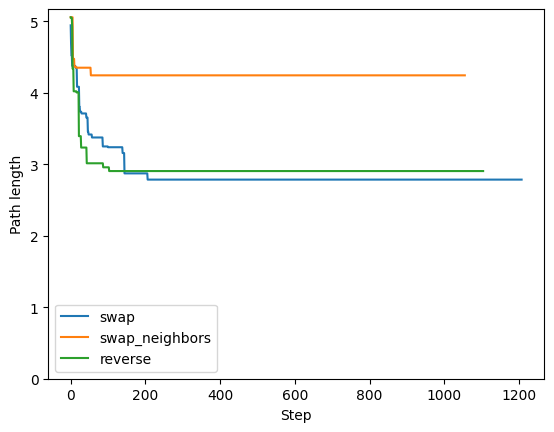

In [ ]:
plt.plot(range(len(history_swap)), history_swap, label = "swap")
plt.plot(range(len(history_swap_neighbors)), history_swap_neighbors, label = "swap_neighbors")
plt.plot(range(len(history_reverse)), history_reverse, label = "reverse")
plt.xlabel("Step")
plt.ylabel("Path length")
plt.ylim(bottom = 0)
plt.legend()
plt.show()

### Comparison of Local Move Strategies

We compare the local move strategies using 100 random problems.

In [ ]:
N = 100 # replications
n = 20 # number of cities

results = {
    'swap' : np.zeros(shape = [N]),
    'swap_neighbors' : np.zeros(shape = [N]),
    'reverse' : np.zeros(shape = [N])
}

for i in range(N):
    tsp_test = random_tsp(n)
    initial_tour = random_tour(n)

    results['swap'][i] = tour_length(tsp_test,
        FCSHC(tsp_test, initial_tour, local_move_method = move_swap, verbose = False))

    results['swap_neighbors'][i] = tour_length(tsp_test,
        FCSHC(tsp_test, initial_tour, local_move_method = move_swap_neighbors, verbose = False))

    results['reverse'][i] = tour_length(tsp_test,
        FCSHC(tsp_test, initial_tour, local_move_method = move_reverse, verbose = False))

    swap  swap_neighbors  reverse
0   3.81            7.50     3.13
1   4.15            7.72     4.10
2   4.75            8.74     4.01
3   4.91            9.67     4.27
4   5.50            8.18     4.44
..   ...             ...      ...
95  4.22            7.98     4.09
96  4.18            8.12     3.84
97  5.46            8.96     4.31
98  4.00            9.23     4.56
99  4.32            8.59     3.93

[100 rows x 3 columns]
swap              4.57
swap_neighbors    8.25
reverse           3.95
dtype: float64


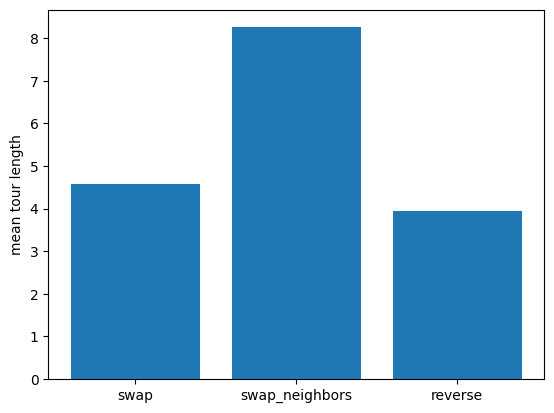

In [ ]:
# compare averages
import pandas as pd
import matplotlib.pyplot as plt

results = pd.DataFrame(results)
print(results)

means = np.mean(results, axis = 0)
print(means)

plt.bar(means.keys(), means)
plt.ylabel("mean tour length")
plt.show()


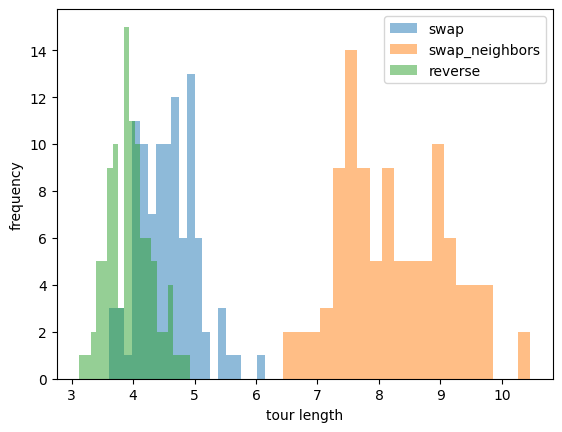

In [ ]:
# histogram

plt.hist(results['swap'], bins = 20, alpha = .5)
plt.hist(results['swap_neighbors'], bins = 20, alpha = .5)
plt.hist(results['reverse'], bins = 20, alpha = .5)
plt.xlabel("tour length")
plt.ylabel("frequency")
plt.legend(labels = ["swap", "swap_neighbors", "reverse"])
plt.show()

<Axes: >

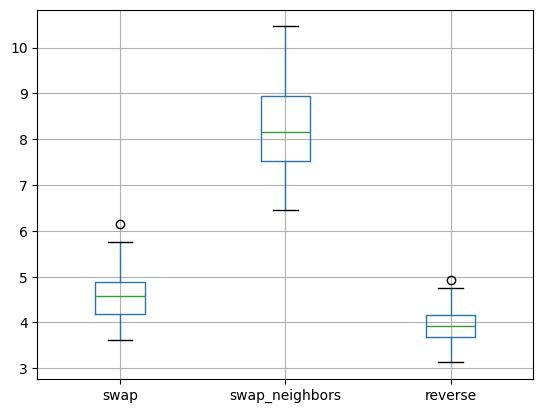

In [ ]:
# boxplot (from pandas.DataFrame)

results.boxplot()

In [ ]:
# is reverse better than swap?
# perform a paired t-test

from scipy import stats

stats.ttest_rel(results['swap'], results['reverse'])

TtestResult(statistic=np.float64(15.156350887305171), pvalue=np.float64(1.5149009939150663e-27), df=np.int64(99))

## Simulated Annealing [2 Points]

Simulated annealing is a form of stochastic hill climbing that also allows downhill moves with a probability proportional to the temperature. This is done to avoid local optima. The temperature is decreased in every iteration following an annealing schedule.

Finding a good cooling schedule for the problem is the most challenging part of simulated annealing. Some guidance can be found [here](http://what-when-how.com/artificial-intelligence/a-comparison-of-cooling-schedules-for-simulated-annealing-artificial-intelligence/).

The initial temperature $T_0$ should be chosen such that initially any move, no matter how bad, has a high probability of being performed. For $P = exp(-\Delta E/T_0)$ we get a probability of $exp(-1) = 0.37$ if $T_0$ is equal to the worst $\Delta E$. This is typically enough.

For the schedule, $T_t = T_0 \alpha^t$ is popular with $\alpha$ less but close to 1 and $t$ being the time step. Note that this is equivalent to multiplying the current temperature with $\alpha$ at every step.

In [ ]:
def schedule(t, T0, alpha):
    return(T0 * alpha ** t)

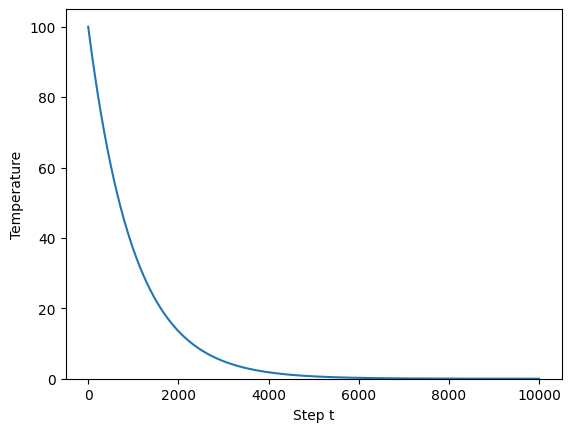

In [ ]:
ts = range(0,10000)
plt.plot(ts, [schedule(t, 100, 0.999) for t in ts])
plt.xlabel("Step t")
plt.ylabel("Temperature")
plt.ylim(bottom = 0)
plt.show()

In [ ]:
def SA(tsp, tour = None, local_move_method = move_reverse,
         T0 = None, alpha = 0.999, epsilon = 1e-3, verbose = True, keep_history = False):

    n = len(tsp['pos'])

    if keep_history: history = list()

    # 1. initialize current tour
    # current tour = initial tour (random if no tour is given)
    if not tour is None:
        current_tour = tour
    else:
        current_tour = random_tour(n)

    # initial tour length
    current_length = tour_length(tsp, current_tour)
    if verbose: print(f"initial tour length: {current_length:3.3}")

    # use the worst case length. We use the maximal distance for each row of the distance matrix.
    # This may not be a valid tour, but it is an upper limit for deltaE.
    if T0 is None:
        T0 = np.sum(np.amax(tsp["dist"], axis = 0))

    # 2. repeat local moves till temperature is low enough
    T = T0
    t = 0
    while T > epsilon:

        # calculate temperature from schedule
        T = schedule(t, T0, alpha)

        # create random move
        new_tour = local_move_method(current_tour)
        new_length = tour_length(tsp, new_tour)

        deltaE = new_length - current_length

        # check if the new tour is better
        if deltaE < 0 or np.random.rand() < math.exp(-deltaE/T):
            current_tour = new_tour
            current_length = new_length
            if verbose: print(f"step: {t} \t temp: {T:5.3f} \t deltaE: {deltaE:+3.3f} \t new tour length: {current_length:3.3f}")

        if keep_history: history.append(current_length)

        t += 1

    if keep_history: return(current_tour, history)
    return(current_tour)

CPU times: user 1.55 s, sys: 17.1 ms, total: 1.57 s
Wall time: 1.56 s
Tour length: 2.76


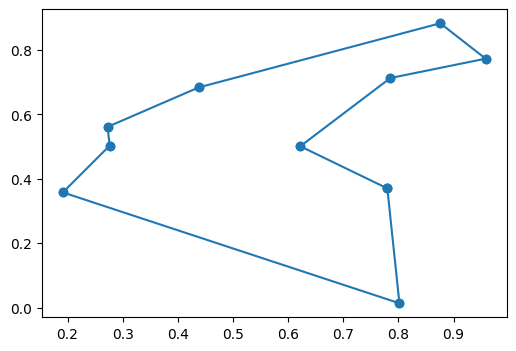

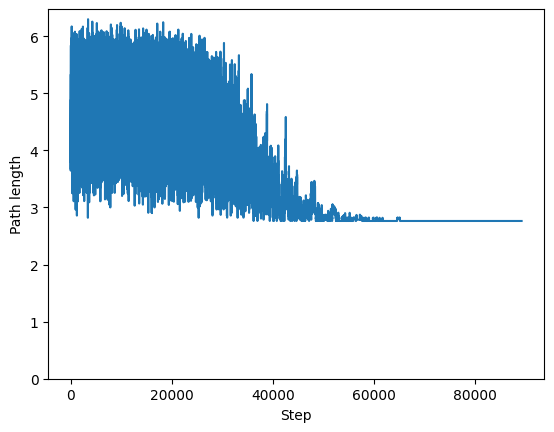

In [ ]:
%time tour, history = SA(tsp, local_move_method = move_swap, alpha = 0.9999, verbose = False, keep_history = True)
show_tsp(tsp, tour)

plt.plot(range(len(history)), history)
plt.xlabel("Step")
plt.ylabel("Path length")
plt.ylim(bottom = 0)
plt.show()

## Compare Performance [2 Points]

Use runtime, scalability (number of cities), and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [ ]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.2486705780029297 milliseconds


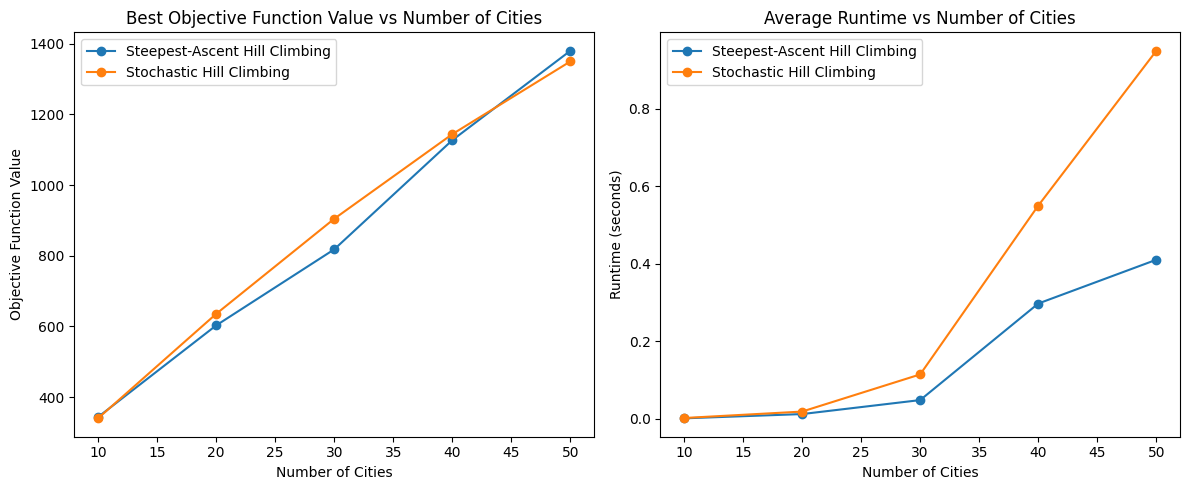

In [ ]:
# Code and results go here
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# =============================
#  Hàm tính giá trị hàm mục tiêu (tổng quãng đường)
# =============================
def tsp_objective_function(route, distances):
    total_distance = 0
    for i in range(len(route)):
        total_distance += distances[route[i - 1], route[i]]
    return total_distance

# =============================
# Sinh hàng xóm (neighbor) bằng cách hoán đổi 2 thành phố
# =============================
def get_neighbors(route):
    neighbors = []
    for i in range(len(route)):
        for j in range(i + 1, len(route)):
            neighbor = route.copy()
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            neighbors.append(neighbor)
    return neighbors

# =============================
# Steepest-Ascent Hill Climbing
# =============================
def steepest_ascent_hill_climb(distances, max_iter=1000):
    n_cities = len(distances)
    current_route = list(range(n_cities))
    random.shuffle(current_route)
    current_value = tsp_objective_function(current_route, distances)

    for _ in range(max_iter):
        neighbors = get_neighbors(current_route)
        best_neighbor = min(neighbors, key=lambda route: tsp_objective_function(route, distances))
        best_value = tsp_objective_function(best_neighbor, distances)

        if best_value < current_value:
            current_route, current_value = best_neighbor, best_value
        else:
            break  # local optimum

    return current_route, current_value

# =============================
# Stochastic Hill Climbing
# =============================
def stochastic_hill_climb(distances, max_iter=1000):
    n_cities = len(distances)
    current_route = list(range(n_cities))
    random.shuffle(current_route)
    current_value = tsp_objective_function(current_route, distances)

    for _ in range(max_iter):
        neighbors = get_neighbors(current_route)
        # Lọc ra các neighbor tốt hơn
        better_neighbors = [route for route in neighbors if tsp_objective_function(route, distances) < current_value]

        if better_neighbors:
            next_route = random.choice(better_neighbors)
            current_route = next_route
            current_value = tsp_objective_function(current_route, distances)
        else:
            break  # local optimum

    return current_route, current_value

# =============================
# So sánh hiệu năng (Compare Performance)
# =============================
def generate_random_distances(n_cities, seed=None):
    if seed is not None:
        np.random.seed(seed)
    distances = np.random.randint(10, 100, size=(n_cities, n_cities))
    np.fill_diagonal(distances, 0)
    distances = (distances + distances.T) // 2
    return distances

def compare_performance(city_sizes=[10, 20, 30, 40, 50], repeats=5):
    results = {'n_cities': [], 'algo': [], 'best_value': [], 'avg_time': []}

    for n in city_sizes:
        for algo_name, algo_func in [
            ('Steepest-Ascent Hill Climbing', steepest_ascent_hill_climb),
            ('Stochastic Hill Climbing', stochastic_hill_climb)
        ]:
            total_time = 0
            best_values = []

            for _ in range(repeats):
                distances = generate_random_distances(n)
                start_time = time.time()
                best_route, best_value = algo_func(distances)
                elapsed = time.time() - start_time

                total_time += elapsed
                best_values.append(best_value)

            results['n_cities'].append(n)
            results['algo'].append(algo_name)
            results['best_value'].append(np.mean(best_values))
            results['avg_time'].append(total_time / repeats)

    return results

# =============================
# Vẽ biểu đồ kết quả
# =============================
results = compare_performance()

plt.figure(figsize=(12,5))

# Biểu đồ giá trị hàm mục tiêu
plt.subplot(1,2,1)
for algo in set(results['algo']):
    mask = np.array(results['algo']) == algo
    plt.plot(np.array(results['n_cities'])[mask],
             np.array(results['best_value'])[mask],
             marker='o', label=algo)
plt.title("Best Objective Function Value vs Number of Cities")
plt.xlabel("Number of Cities")
plt.ylabel("Objective Function Value")
plt.legend()

# Biểu đồ thời gian chạy
plt.subplot(1,2,2)
for algo in set(results['algo']):
    mask = np.array(results['algo']) == algo
    plt.plot(np.array(results['n_cities'])[mask],
             np.array(results['avg_time'])[mask],
             marker='o', label=algo)
plt.title("Average Runtime vs Number of Cities")
plt.xlabel("Number of Cities")
plt.ylabel("Runtime (seconds)")
plt.legend()

plt.tight_layout()
plt.show()


## Bonus: Genetic Algorithm [+1 Point]

In [ ]:
def crossover(parent1, parent2):
    n = len(parent1)
    start, end = sorted(random.sample(range(n), 2))
    child = [-1]*n
    child[start:end] = parent1[start:end]
    fill = [x for x in parent2 if x not in child]
    idx = 0
    for i in range(n):
        if child[i] == -1:
            child[i] = fill[idx]
            idx += 1
    return child

def mutate(tour, rate=0.1):
    if random.random() < rate:
        i, j = random.sample(range(len(tour)), 2)
        tour[i], tour[j] = tour[j], tour[i]
    return tour

def genetic_algorithm(tsp, pop_size=50, generations=200, mutation_rate=0.1, verbose=True, keep_history=False):
    n = len(tsp["pos"])
    population = [random_tour(n) for _ in range(pop_size)]
    best_tour = min(population, key=lambda t: tour_length(tsp, t))
    best_length = tour_length(tsp, best_tour)
    if keep_history: history = [best_length]

    for g in range(generations):
        fitness = np.array([1 / tour_length(tsp, t) for t in population])
        probs = fitness / fitness.sum()
        new_pop = []
        for _ in range(pop_size // 2):
            p1, p2 = random.choices(population, weights=probs, k=2)
            child1 = mutate(crossover(p1, p2), mutation_rate)
            child2 = mutate(crossover(p2, p1), mutation_rate)
            new_pop += [child1, child2]
        population = new_pop

        current_best = min(population, key=lambda t: tour_length(tsp, t))
        current_len = tour_length(tsp, current_best)
        if current_len < best_length:
            best_tour, best_length = current_best, current_len
        if keep_history: history.append(best_length)
        if verbose and g % 50 == 0:
            print(f"Generation {g}: Best length = {best_length:.3f}")

    if keep_history:
        return best_tour, history
    return best_tour


CPU times: user 401 ms, sys: 2.88 ms, total: 404 ms
Wall time: 788 ms
Tour length: 2.91


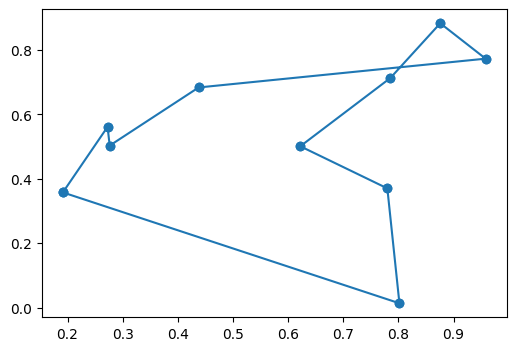

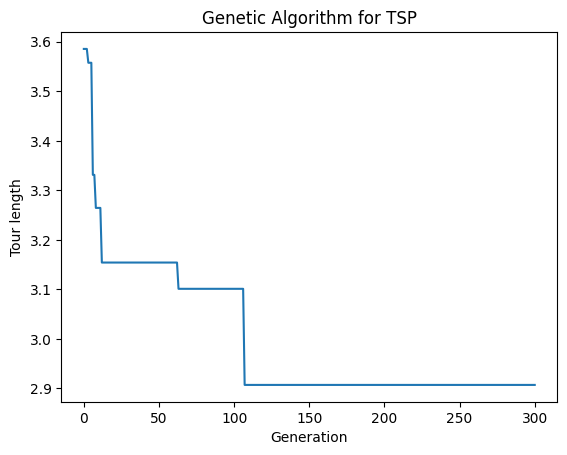

In [ ]:
%time ga_tour, ga_history = genetic_algorithm(tsp, generations=300, mutation_rate=0.05, verbose=False, keep_history=True)
show_tsp(tsp, ga_tour)

plt.plot(range(len(ga_history)), ga_history)
plt.xlabel("Generation")
plt.ylabel("Tour length")
plt.title("Genetic Algorithm for TSP")
plt.show()
